Lab 3 - Keith Farrugia 11104L

___

# Imports

Below are the imports used in the following lab.

In [79]:
import os
from scipy import signal
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython.display as ipd
import operator

___
# Preparation

In [80]:
imperfect_fs, imperfect_x = wavfile.read(os.path.join('data','imperfect_sos_cw_700_15_wpm.wav'))
ipd.display(ipd.Audio(data=imperfect_x, rate=imperfect_fs))


noisy_fs, noisy_x = wavfile.read(os.path.join('data','noisy_sos_cw_700_15_wpm.wav'))
ipd.display(ipd.Audio(data=noisy_x, rate=noisy_fs))

___

# Frequency Domain Analysis

## Descrete Fourier Transform of Imperfect SOS

In [81]:
X_imperfect = np.fft.fft(imperfect_x,norm='forward')
F_imperfect = np.fft.fftfreq(len(X_imperfect), 1/imperfect_fs)

## Plotting of Magnitudes of Frequency Response for Imperfect SOS

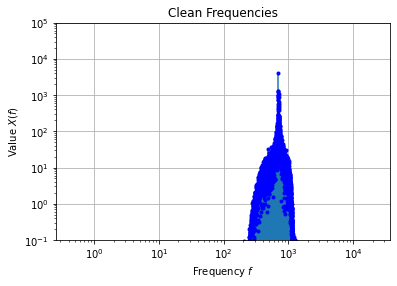

In [82]:
plt.figure()
plt.stem(np.fft.fftshift(F_imperfect),np.fft.fftshift(np.abs(X_imperfect)),markerfmt='b.')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-1,1e5)
plt.grid(True)
plt.xlabel('Frequency $f$')
plt.ylabel('Value $X(f)$')
plt.title('Clean Frequencies')
plt.show()

## Analysis of Results

In [83]:
Amplitude_imperfect = (np.fft.fftshift(np.abs(X_imperfect)))
Frequency_imperfect = (np.fft.fftshift(F_imperfect))

maximum_frequency = max(Amplitude_imperfect)
maximum_index = []

for i in range(0,len(Amplitude_imperfect)):
    if Amplitude_imperfect[i] == maximum_frequency:
        maximum_index.append(i)
print('The biggest number in the given array is:', maximum_frequency, " at positions: ", maximum_index)
print("Frequency at ", maximum_index, " is ", Frequency_imperfect[maximum_index])

The biggest number in the given array is: 4101.181318350038  at positions:  [49079, 52297]
Frequency at  [49079, 52297]  is  [-699.93785511  699.93785511]


In order to create the imperfect SOS signal multiple sin waves need to be combined together in order for the combined frequencies to form the final function. The plotted function is the split frequencies of all those seperated signals together with their amplitudes. The carrier signal is the signal holding the most energy, or in other words the one with the largest amplitude. In order to obtain its frequency we only have to take the position of the largest amplitude and find its frequency according to the graph. This gave two frequencies +/- 699.938. Since the graph is symetric around the y-axis (although the modulous is taken in the above plot), the frequency of the carrier signal can hence be taken as 699.938. 

## Descrete Fourier Transform of Noisy SOS

In [84]:
X_noisy = np.fft.fft(noisy_x,norm='forward')
F_noisy = np.fft.fftfreq(len(X_noisy), 1/noisy_fs)

## Plotting of Magnitudes of Frequency Response for Noisy SOS

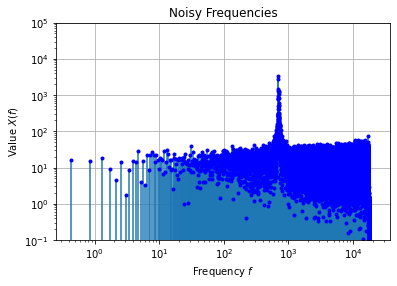

In [85]:
plt.figure()
plt.stem(np.fft.fftshift(F_noisy),np.fft.fftshift(np.abs(X_noisy)),markerfmt='b.')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-1,1e5)
plt.grid(True)
plt.xlabel('Frequency $f$')
plt.ylabel('Value $X(f)$')
plt.title('Noisy Frequencies')
plt.show()

## Ananlysis of Results

In [86]:
Amplitude_noisy = (np.fft.fftshift(np.abs(X_noisy)))
Frequency_noisy = (np.fft.fftshift(F_noisy))

maximum_frequency = max(Amplitude_noisy)
maximum_index = []

for i in range(0,len(Amplitude_noisy)):
    if Amplitude_noisy[i] == maximum_frequency:
        maximum_index.append(i)
        
print('The biggest number in the given array is:', maximum_frequency, " at positions: ", maximum_index)
print("Frequency at ", maximum_index, " is ", Frequency_noisy[maximum_index])

The biggest number in the given array is: 3411.769435819619  at positions:  [49637, 52891]
Frequency at  [49637, 52891]  is  [-699.81566011  699.81566011]


Similarly to before the Noisy SOS is also made up of several frquencies. The freuquency of what previously was the carrier wave is still recognizable although being slightly off value due to the distortion. Another observation to be made is that most frequencies seem to be on the higher end of the spectroom, even though not all have large amplitudes, as shown by the high consentration of points on the plot. The maximum amplitude of the noise also seems to also be in a somewhat consistent range. 

___
# Frequency Domain Filter

## Deducing a siutable range of frequencies.

The range of frequencies chosen is desiphered from the original clean SOS where the highest consentration of frequencies was found. The noisy SOS frequency was also taken into account in order to try and limit the wide range of frequencies. Therefore areas with outliers where trimmed. Below is the range of frequencies chosen from the plotted imperfect SOS (250 - 1000).

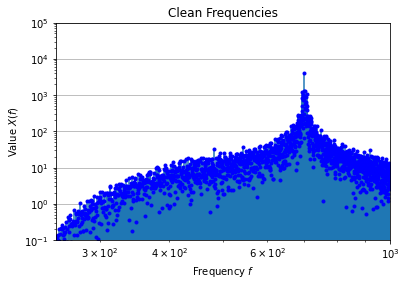

In [87]:
plt.figure()
plt.stem(np.fft.fftshift(F_imperfect),np.fft.fftshift(np.abs(X_imperfect)),markerfmt='b.')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-1,1e5)
plt.xlim([250,1000])
plt.grid(True)
plt.xlabel('Frequency $f$')
plt.ylabel('Value $X(f)$')
plt.title('Clean Frequencies')
plt.show()

## Discarding Coefficients outside of range

In [88]:
total = 0
filtered_X_noisy = X_noisy
for i in range(0,len(F_noisy)):
    if np.abs(F_noisy[i] <= 250) or np.abs(F_noisy[i] >= 1000):
        filtered_X_noisy[i] = 0
        total +=1
    else :
        filtered_X_noisy[i] = X_noisy[i]
        
print("Total number of Frequencies: ",len(filtered_X_noisy))
print("Total number of Discarded Frequencies: ",total)

Total number of Frequencies:  102528
Total number of Discarded Frequencies:  100785


## Plotting Frequency Response of Filtered Signal

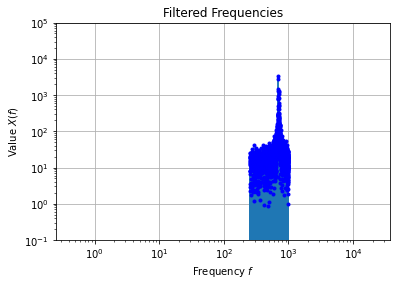

In [89]:
plt.figure()
plt.stem(np.fft.fftshift(F_noisy),np.fft.fftshift(np.abs(filtered_X_noisy)),markerfmt='b.')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-1,1e5)
plt.grid(True)
plt.xlabel('Frequency $f$')
plt.ylabel('Value $X(f)$')
plt.title('Filtered Frequencies')
plt.show()

## Plotting the Time Domain of the filtered Signal

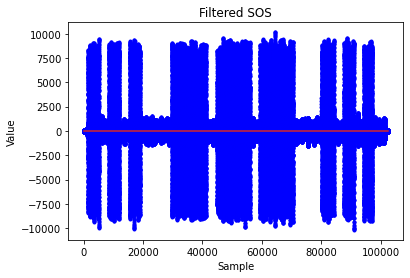

In [90]:
filtered_signal_noisy = np.fft.ifft(filtered_X_noisy, norm = 'forward').real

plt.figure()
plt.stem(filtered_signal_noisy,markerfmt='b.')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Filtered SOS')
plt.show()

The plotted graph can be seen to be closer matching to that of the original clean SOS when compared to the noisy one. This shows that the cutting out frequencies has a positive effect when removing distortion from a similar signal. The filtered SOS plotted is also similare to that of the original filtered SOS obtained at the end of lab 1. 

## Playing the Filtered Signal

In [91]:
ipd.display(ipd.Audio(data=filtered_signal_noisy, rate=noisy_fs))

The audio is more coherent then the static noise of the noisy SOS. Although the audio might be less clear to that obtained during lab 1, this may be due to the fact that noise frequencies in the range kept, are still un-altered. A wind like noise can still be heard.